In [1]:
from numpy import genfromtxt
train = genfromtxt('train.csv', delimiter=',')
test = genfromtxt('test.csv', delimiter=',')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [4]:
##this is a preprocessed dataset, we just need to apply the model
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 784)


In [9]:
##Defining labels and predictors
x_train = train[:50000,:-1]
x_test = train[50000:,:-1]
y_train = train[:50000,-1]
y_test = train[50000:,-1]

In [10]:
##Normalizing the data
x_train = x_train/255
x_test = x_test/255

In [11]:
import numpy as np

np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [14]:
###Applying PCA 

import logging
import matplotlib.pyplot as plt

value = []
x =[]
for i in range(50,110,5):
    n_components = i
    print("Extracting the top %d eigenfaces from %d digits"
      % (n_components, x_train.shape[0]))

    pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(x_train)

    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    value.append(pca.noise_variance_)
    x.append(i)

Extracting the top 50 eigenfaces from 50000 digits
Extracting the top 55 eigenfaces from 50000 digits
Extracting the top 60 eigenfaces from 50000 digits
Extracting the top 65 eigenfaces from 50000 digits
Extracting the top 70 eigenfaces from 50000 digits
Extracting the top 75 eigenfaces from 50000 digits
Extracting the top 80 eigenfaces from 50000 digits
Extracting the top 85 eigenfaces from 50000 digits
Extracting the top 90 eigenfaces from 50000 digits
Extracting the top 95 eigenfaces from 50000 digits
Extracting the top 100 eigenfaces from 50000 digits
Extracting the top 105 eigenfaces from 50000 digits


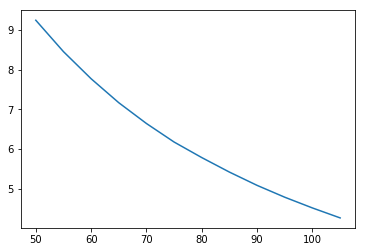

In [15]:
##ploting variance vs number of predictors
pca = PCA(n_components=77, svd_solver='randomized',whiten=True).fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

%matplotlib inline
plt.plot(x,value)

In [17]:
##grid search for best parameters on the 1st 10000 rows( to reduce computational expense).

from sklearn.svm import SVC

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca[:10000,], y_train[:10000,])
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [19]:
###Final model is build on the best parameters
from sklearn.svm import SVC
clf = SVC(kernel='rbf', class_weight='balanced',C=1000, gamma = 0.01)
clf = clf.fit(x_train_pca, y_train)
y_pred = clf.predict(x_test_pca)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1024
        1.0       0.99      0.99      0.99      1110
        2.0       0.97      0.98      0.98       989
        3.0       0.98      0.98      0.98      1013
        4.0       0.98      0.98      0.98       989
        5.0       0.99      0.98      0.98       904
        6.0       0.99      0.99      0.99       986
        7.0       0.97      0.98      0.97      1030
        8.0       0.98      0.97      0.98       971
        9.0       0.98      0.97      0.97       984

avg / total       0.98      0.98      0.98     10000

[[1019    0    3    0    0    0    0    1    0    1]
 [   1 1098    2    2    1    0    0    5    1    0]
 [   4    1  969    3    1    2    0    8    1    0]
 [   1    1    6  989    0    5    0    6    3    2]
 [   1    2    3    0  973    0    1    1    2    6]
 [   3    0    2    5    1  883    3    0    5    2]
 [   1    0    1    0    1    2  981    0  

In [21]:
print("HELLO WORLD, the accuracy is 98%")

HELLO WORLD, the accuracy is 98%
